# Data cleaning

Often we get data in a file that contains unexpected and odd things inside. If not removed in a proper way, they can cause problems in our analysis. For example, NaNs, infinite values, or just really large outliers may cause things in our code to behave in an unexpected way. It is good practice to **get in the habit of visualizing and processing datasets before you start using them!** This programming assignment will illustrate this process.

Topics in this assignment includes two tasks: 
1. Finding "odd" values in an array and removing them
2. Using plots to identify other "oddities" that can be removed.

In [1]:
# use the mude-base environment

import numpy as np
import matplotlib.pyplot as plt
import os
from urllib.request import urlretrieve

## Part 1: Importing and Cleaning the array


For this assignment we will use one csv file, `data_2.csv`, which we can download with the following code.

In [2]:
def findfile(fname):
    if not os.path.isfile(fname):
        print(f"Downloading {fname}...")
        urlretrieve('http://files.mude.citg.tudelft.nl/PA1.3/'+fname, fname)

findfile('data_2.csv')

In a previous week we looked at how to read in data from a csv, plot a nice graph and even find the $R^2$ of the data. This week, an eager botany student, Johnathan, has asked us to help him analyze some data: 1000 measurements have just been completed over the 100 m of greenhouse and are ready to use in `data_2.csv`. Jonathan happens to have a lot of free time but not that much experience taking measurements. Thus, there is some noise in the data and some problematic data that are a result of an error in the measurement device. Let's help them out!

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 6.1:}$
    
Import the data as 2 numpy arrays: distance and temperature. Tip, makes use of the function <code>numpy.genfromtxt</code>.
</p>
</div>

In [ ]:
distance, temperature = # YOUR_CODE_HERE

In [3]:
distance, temperature = np.genfromtxt("data_2.csv", skip_header = 1, delimiter=",", unpack=True)

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 6.2:}$
    
In the code cell below, evaluate the size of the array.
</p>
</div>

In [ ]:
# YOUR_CODE_HERE

In [4]:
temperature.size

1000

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 6.3:}$
    
Check if there are NaN (not a number) values in the temperature array. You can use the numpy method <code>isnan</code>, which returns a boolean vector (False if it is not a NaN, and True if it is a NaN). Save the result in the variable <code>temperature_is_nan</code>. The code block below will also help you inspect the results.
</p>
</div>

In [ ]:
temperature_is_nan = # YOUR_CODE_HERE

print("The first 10 values are:", temperature_is_nan[0:10])
print(f"There are {temperature_is_nan.sum()} NaNs in array temperature")

In [5]:
temperature_is_nan = np.isnan(temperature)

print("The first 10 values are:", temperature_is_nan[0:10])
print(f"There are {temperature_is_nan.sum()} NaNs in array temperature")

The first 10 values are: [False False False False False False False False False False]
There are 3 NaNs in array temperature



Let's slice the array using the `temperature_is_nan` array we just found to eliminate the NaNs. We can use the symbol `~`, which denotes the opposite: we want to keep those where np.isnan gives False as an answer.

In [6]:
temperature = temperature[~temperature_is_nan]

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 6.4:}$
    
Check the size again, and make sure you recognize that we over-wrote the variable `temperature`. This will have an impact on other cells where you use this variable, for example, if you re-run the cell below Task 1.3, the result will be different, because the array contents have changed.

How big is the array now? How many values were removed?
</p>
</div>

In [11]:
# YOUR_CODE_HERE

In [7]:
temperature.size

997


But now we have a problem: our `distance` array still has the entries that correspond to the bad entries in `temperature`. We can see that the dimensions of the arrays no longer match:

In [8]:
distance.size == temperature.size

False


Also, we don't know what the index of the removed values were, since we over-wrote `temperature`! Luckily we have our `temeprature_is_nan` array, which records the indices with Nans, which we can also use to update our `distance` array.

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 6.5:}$
    
Use the boolean array from Task 1.3 to remove the matching entries in the distance array, then check that it has the same length as temperature.
</p>
</div>

In [ ]:
distance = # YOUR_CODE_HERE 
distance.size==temperature.size

In [9]:
distance = distance[~temperature_is_nan]
distance.size==temperature.size

True

## Part 2: Visualizing the Dataset

Now we can plot the temperature with distance to see what it looks like.

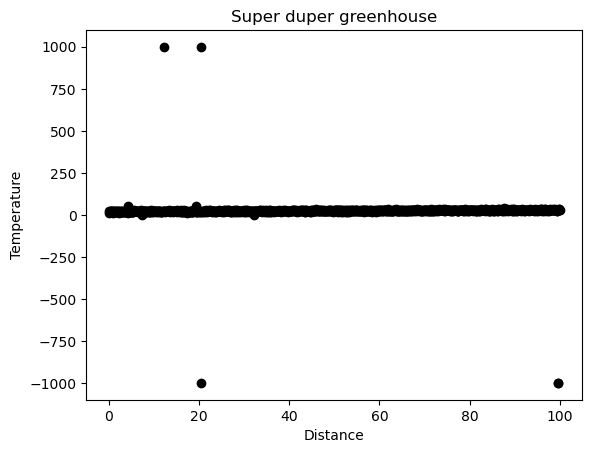

In [10]:
plt.plot(distance, temperature, "ok", label="Temperature")
plt.title("Super duper greenhouse")
plt.xlabel("Distance")
plt.ylabel("Temperature")
plt.show()


It looks like there are some outliers in the dataset still! Let's investigate:

In [11]:
print(temperature.min())
print(temperature.max())

-999.0
999.0



The values are suspcious since they are +/-999...this is a common error code with some sensors, so we can assume that they can be removed from the dataset. We can easily remove these erroneous values of temperature, but this time we will use a different method than before. The exclamation mark before an equal sign, `!=`, denotes "not equal to." We can use this as a logic operator to directly eliminate the values in one line. For example:

`array_1 = array_1[array_2 != -999]`


<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 6.6:}$
    
Use the "not equal to" operator to re-define temperature and distance such that all the temperatures with -999 are removed (don't do the +999 values yet!). Keep in mind that the order of the arrays matters: if you reassign temperature, you won't have the information any more to fix distance!!!
</p>
</div>

In [ ]:
 ### YOUR_CODE_LINES_HERE

In [12]:
distance = distance[temperature!=-999]
temperature = temperature[temperature!=-999]

 Are the arrays the same size still? If you did it correctly, they should be.

In [13]:
print(distance.size == temperature.size)
temperature.size

True


994

For the +999 values we will use yet another method, a combination of the previous two.

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 6.7:}$
    
Use the not equal to operator <b>and</b> a boolean array to define an array "mask" that will help you remove the data corresponding to temperatures with +999.
</p>
</div>

We can also do it with a boolean for data_y.

In [ ]:
mask = # YOUR_CODE_HERE
distance = distance[mask]
temperature = temperature[mask]

In [14]:
mask = temperature!=999
distance = distance[mask]
temperature = temperature[mask]

The array is named "mask" because this process utilizes **masked arrays**...you can read more about it [here](https://python.plainenglish.io/numpy-masks-in-python-d8c13509fbc8).

Anyway, now that we have removed the annoying +/-999 values, we can finally start to see our dataset more clearly:

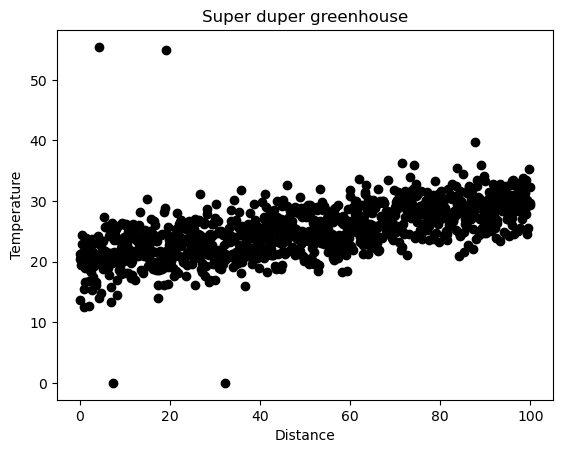

In [15]:
plt.plot(distance, temperature, "ok", label="Temperature")
plt.title("Super duper greenhouse")
plt.xlabel("Distance")
plt.ylabel("Temperature")
plt.show()

Looks good! But wait—there also appear to be some values in the array that are not physically possible! We know for sure that there was nothing cold in the greenhouse during the measurements; also it's very likely that a "0" value could have come from an error in the sensor.

See if you can apply the `numpy` method `nonzero` to remove zeros from the array. Hint: it works in a very similar way to `isnan`, which we used above.

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 6.8:}$
    
Use <code>nonzero</code> to remove the zeros.
</p>
</div>

In [ ]:
distance = # YOUR_CODE_HERE 
temperature = # YOUR_CODE_HERE

In [16]:
distance = distance[np.nonzero(temperature)]
temperature = temperature[np.nonzero(temperature)]

It also seems quite obvious that the values above 50 degrees are also not physically possible (or perhaps Jonathan was standing near an oven?!). In any case, they aren't consistent with the rest of the data, so we should remove them.

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 6.9:}$
    
Use an inequality, <code><</code> to keep all values less than 50.
</p>
</div>

In [ ]:
### YOUR_CODE_LINES_HERE

In [17]:
distance = distance[temperature<50]
temperature = temperature[temperature<50]

Now let's take another look at our data:

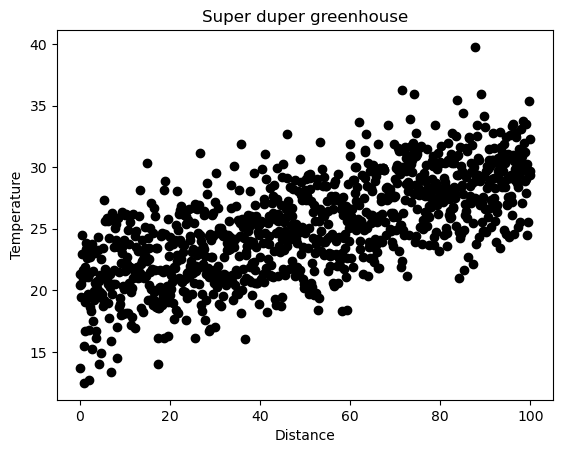

In [18]:
plt.plot(distance, temperature, "ok", label="Temperature")
plt.title("Super duper greenhouse")
plt.xlabel("Distance")
plt.ylabel("Temperature")
plt.show()

Let's pretend that there is a systematic error in our measurement device because it was not calibrated properly. As a result, all observations below 15 degrees need to be corrected by multiplying the measurement by 1.5. Numpy actually makes it very easy to replace the contents of an array based on a condition using the `where` method!

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 6.10:}$
    
Play with the cell below to understand what the <code>where</code> method does (i.e., replacement)—it's very useful to know about!
</p>
</div>

In [19]:
temperature = np.where(temperature > 15, temperature, temperature * 1.5)

Remember you can investigate the `where` function in a notebook easily by executing `np.where?`. Try it and read the documentation!

Let's plot the array again to see what happened (you'll have to compare the two plots carefully to see the difference). Remember, that if you rerun the cell above many times, it will over-write `temperature`, so you will probably need to restart the kernel a few times to reset the values.

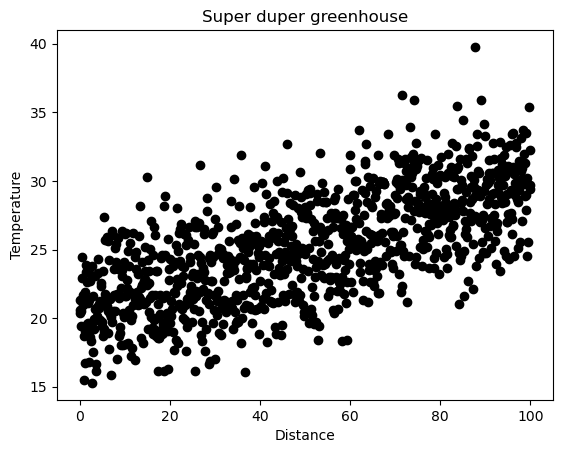

In [20]:
plt.plot(distance, temperature, "ok", label="Temperature")
plt.title("Super duper greenhouse")
plt.xlabel("Distance")
plt.ylabel("Temperature")
plt.show()

Now that we are done cleaning the data, let's learn about it. 

<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\text{Task 6.11:}$
    
Calculate the mean and variance of temperature. Use built-in numpy functions.
</p>
</div>

In [ ]:
### YOUR_CODE_LINES_HERE
mean_temperature =

In [21]:
mean_temperature = temperature.mean()
print(f"{mean_temperature = :.3f}")

variance_temperature = temperature.var()
print(f"{variance_temperature = :.3f}")

mean_temperature = 25.157
variance_temperature = 16.103


> By Robert Lanzafame, Delft University of Technology. CC BY 4.0, more info [on the Credits page of Workbook](https://mude.citg.tudelft.nl/workbook-2025/credits.html).